$\bf{Теорема 1.}$ 
Пусть случайная величина $\xi$ равномерно распределена на (0, 1), $F(x) - $ непрерывная функция
распределения. Тогда функция распределения случайной величины $ \eta = F^{−1}(\xi)$ равна $F(x).$

Необходимым условием моделирования случайных величин является использование только функции
$\bf{scipy.stats.uniform.rvs}$, с помощью которой можно смоделировать равномерное распределение на
(0, 1). Все остальные распределения нужно получить из неё самостоятельно, пользуясь фактами из курса
теории вероятностей (предельными теоремами и теоремой 1).

In [1]:
from scipy import stats
rvs = stats.uniform.rvs
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

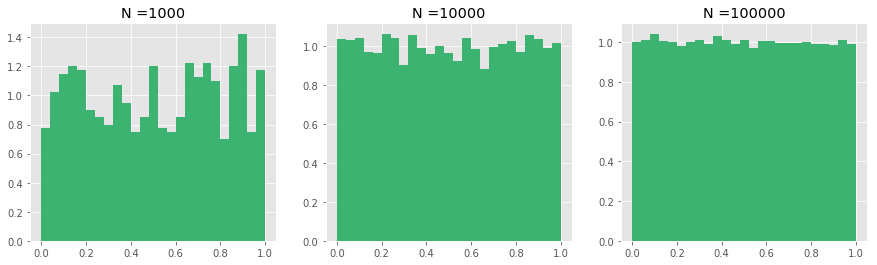

In [2]:
num_list = [1000, 10000, 100000]

fig, ax = plt.subplots(1, len(num_list), figsize=(15, 4))

for i, num_x in enumerate(num_list):
    ax[i].hist(rvs(size=num_x), bins=25, color='mediumseagreen', density=True)
    ax[i].set_title('N =' + str(num_x))
plt.show()

## Задание 1

а) Предложите способ моделирования последовательности независимых испытаний Бернулли $X_1, X_2, ..., X_n$ таких, что $P(X_n = 1) = 1 − P(X_n = 0) = p$.

In [3]:
def make_ber(p, N):
    x_rvs = rvs(size=N)
    x_ber = x_rvs.copy()
    x_ber[x_rvs > p] = 0
    x_ber[x_rvs < p] = 1
    return x_ber

b) Смоделируйте последовательность независимых испытаний Бернулли, указанную в пункте a), с
$p$ = 0, 4 и $n$ = 1000. Вычислите частоты $\frac{μ_k}{k}$, где $μ_k = X_1 + ... + X_k$, при $k$ = 1, ..., 1000. Постройте график зависимости частот от величины $k$ = 1, ..., 1000. Какую теорему иллюстрирует этот пример?

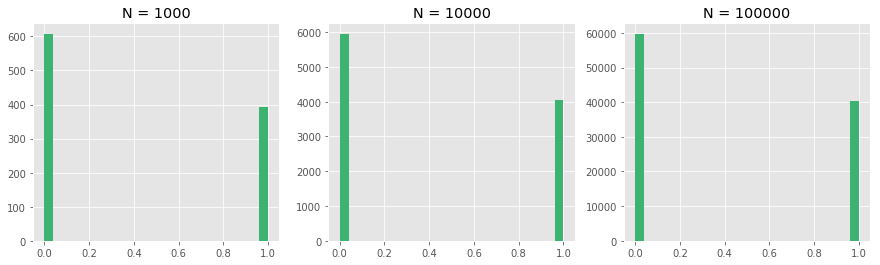

In [5]:
num_list = [1000, 10000, 100000]
p = 0.4

fig, ax = plt.subplots(1, len(num_list), figsize=(15, 4))

for i, num_x in enumerate(num_list):
    ax[i].hist(make_ber(p, num_x), bins=25, color='mediumseagreen')
    ax[i].set_title('N = ' + str(num_x))
plt.show()

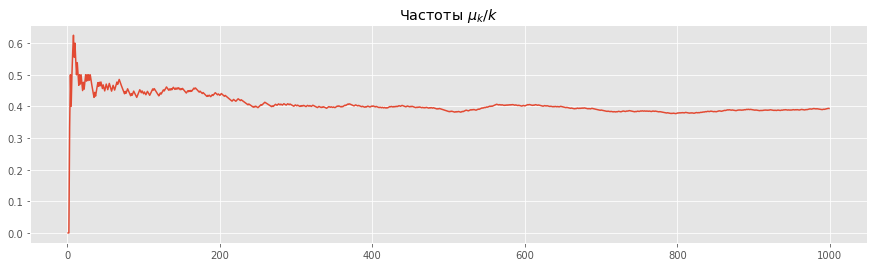

In [6]:
p, N = 0.4, 1000
x_ber = make_ber(p, N)
mu = list(map(lambda k: np.sum(x_ber[:k]), range(1, N)))
mu = np.array(mu)/np.arange(1, N)

plt.figure(figsize=(15, 4))
plt.plot(np.arange(1, N), mu)
plt.title('Частоты $\mu_k/k$')
plt.show()

## Задание 2

a) Предложите способ моделирования независимых случайных величин $X_1, X_2, ..., X_n$, где $$P(X_i \leq t) = 1 − e^{−t/a}, ~ t > 0 ~ (a > 0 - постоянная) ~ i = 1, 2, ..., n.$$


In [7]:
def make_exp(N, a=1):
    x_rvs = rvs(size=N)
    x_exp = -a*np.log(x_rvs)
    return x_exp

b) Смоделируйте независимые показательно распределенные величины $X_1, X_2, ..., X_n$, с $a = 1$, $n = 100$. Постройте график эмпирической функции распределения и на том же графике построте истинную функцию распределения. Постройте гистограмму и на том же графике постройте истинную
функцию плотности.

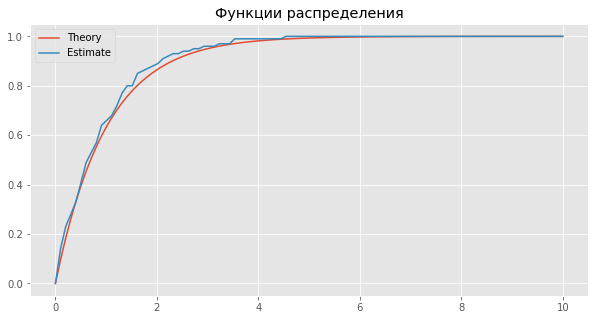

In [8]:
a = 1
N = 100
xlim = np.linspace(0, 10, N)
x_ber = make_exp(N)


P_true = 1 - np.exp(-xlim/a)
P_est = list(map(lambda i:np.sum(x_ber < i)/x_ber.shape[0], xlim))


plt.figure(figsize=(10, 5))

plt.plot(xlim, P_true, '-', label = 'Theory')
plt.plot(xlim, P_est, '-', label = 'Estimate')

plt.legend()
plt.title('Функции распределения')
plt.show()

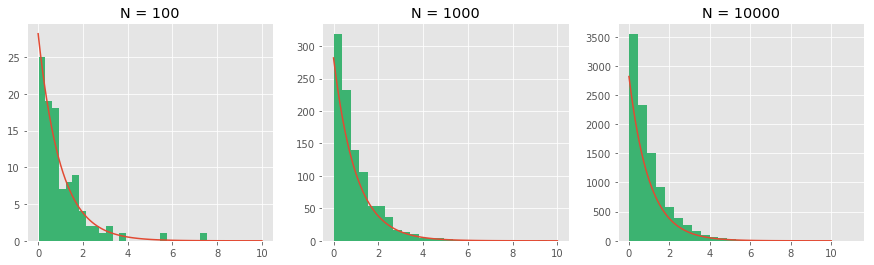

In [14]:
a = 1
num_list = [100, 1000, 10000]
n = 100
xlim = np.linspace(0, 10, n)

fig, ax = plt.subplots(1, len(num_list), figsize=(15, 4))

for i, num_x in enumerate(num_list):
    
    p_true = num_x / 3.55 * np.exp(-xlim*a)/a
    
    ax[i].plot(xlim, p_true, '-', label = 'Theory')
    ax[i].hist(make_exp(num_x), bins=25,  label = 'Estimate', color='mediumseagreen')
    ax[i].set_title('N = ' + str(num_x))

plt.show()

## Задание 3

a) Используя центральную предельную теорему, укажите способ моделирования приближенно нормально распределенных случайных величин;

In [15]:
norm = stats.norm.rvs

In [16]:
def make_norm(N):
    x_rvs = rvs(size=N)
    mu = 1.0 / 2
    sigma = np.sqrt(1.0 / 12)
    x_norm = list(map(lambda k: np.sum(x_rvs[:k]), np.arange(1, N+1)))
    x_norm = (np.array(x_norm) - np.arange(1, N+1) * mu)/(sigma * np.sqrt(np.arange(1, N+1)))
    print(x_norm.shape)
    return x_norm


(100,)
(1000,)
(10000,)
(100000,)


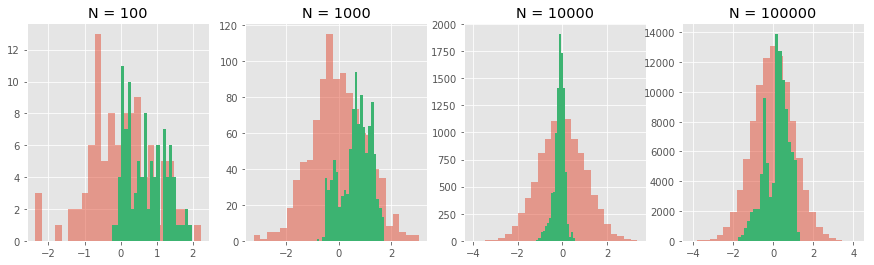

In [17]:
num_list = [100, 1000, 10000, 100000]

fig, ax = plt.subplots(1, len(num_list), figsize=(15, 4))

for i, num_x in enumerate(num_list):
    ax[i].hist(norm(size=num_x), bins=25, alpha=0.5)
    ax[i].hist(make_norm(num_x), bins=25, color='mediumseagreen')
    ax[i].set_title('N = ' + str(num_x))
plt.show()

b) Пусть $X_{N_1} , ..., X_{N_n} —$ реализация последовательности приближенно нормально распределенных
чисел, каждое из которых получено с помощью суммирования, центрирования и нормировки N
равномерно распределенных слагаемых (ЦПТ). Получите три реализации (при $N = 2, 4, 12$) вы-
борок с $n = 100$, $a = 0$, $σ^2 = 1$. Для каждой выборки постройте график эмпирической функции
распределения и на том же графике постройте истинную функцию распределения. Постройте ги-
стограмму и на том же графике постройте истинную функцию плотности. Получите оценки $a$ и
$σ^2$. Вычислите третий и четвертый выборочные центральные моменты и сравните их с истинными
значениями теоретических моментов.

## Задание 4

a) Укажите способ моделирования выборки из биномиального распределения $Bi(k, p)$ (использо-
вать задачу 1). Смоделируйте выборку размера $n = 10, 100, 1000$ из биномиального распределения
с параметрами $k = 100$, $p = 0, 01$. Постройте гистограммы;

In [74]:
def make_bin(N, k, p):
    x_bin = list(map(lambda N: np.sum(make_ber(p, k)), np.arange(0, N)))
    return np.array(x_bin)

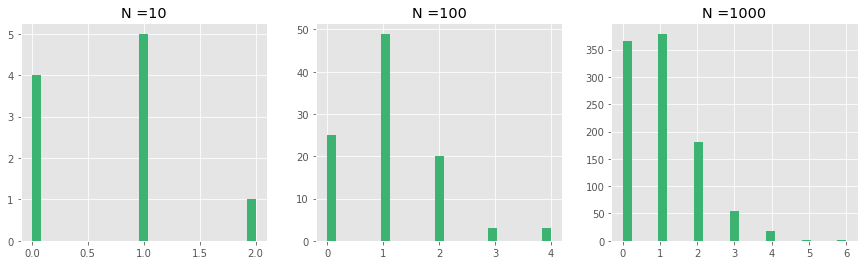

In [113]:
num_list = [10, 100, 1000]
k, p = 100, 0.01

fig, ax = plt.subplots(1, len(num_list), figsize=(15, 4))

for i, num_x in enumerate(num_list):
    ax[i].hist(make_bin(num_x, k, p), bins=25, color='mediumseagreen')
    ax[i].set_title('N =' + str(num_x))
plt.show()

b) Смоделируйте выборку размера $n = 10, 100, 1000$ из распределения Пуассона с параметром $λ = 1$ (использовать пункт a). Выберите количество бернуллиевских случайных величин, которое необходимо взять и поясните свой выбор. Постройте гистограмму частот. Какую теорему иллюстрирует
данный пример?

c) Найти методом моментов точечную оценку параметра p биномиального распределения и оценить вероятность $p_0 = P(ξ = 0)$. Найти методом максимального правдоподобия точечную оценку
неизвестного параметра λ распределения Пуассона.

## Задание 5

Смоделируйте выборки $X_1, ..., X_N$ объема $N = 1000$, и для каждой подвыборки $X_1, ..., X_n$, $n =
1, ..., N$ получите оценки методом моментов и методом максимального правдоподобия параметров
следующих распределений:

a) $N(\Theta_1, \Theta_2^2)$, при моделировании положите $\Theta_1 = 1$, $\Theta_2^2 = 4.$

b) $Bi(1, \Theta)$, при моделировании положите $\Theta = 0, 7$.

c)$R(0, \Theta)$, при моделировании положите $\Theta = 1$.

Постройте график зависимости значений оценки от величины $n$. Как меняется качество оценки с
ростом $n$? Для оценок, полученных в пунктах b) и c) проверить их несмещённость и состоятель-
ность?

## Задание 6

На высоте 1 метр от точки $\Theta$ находится источник $\gamma$-излучения, причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i,$ $i = 1, ..., n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости. Известно, что $X_i$ имеет распределение Коши.

a) Найти оценку максимального правдоподобия для параметра сдвига $\Theta$ распределения Коши (плотность имеет вид: $p(x) = \dfrac{1}{π(1+(x−θ)^2)}$) по выборке из двух наблюдений, если: 1) $X_1 = −1$, $X_2 = 1$; 2)$X_1 = −2$, $X_2 = 2$;

b) Убедитесь в том, что с применением метода моментов и метода максимального правдоподобия для оценки параметра сдвига $\Theta$ возникают трудности;

c) Смоделируйте выборку $X_1, ..., X_N$ объема $N = 1000$ для распределения Коши и проверьте, что
выборочная медиана $\hat{\Theta_n} = x_med$ является хорошей оценкой параметра \Theta, построив график зависимости от $n = 1, ..., N.$ При моделировании положить$\Theta = 0$.

## Задание 7

Смоделируйте выборки $X_1, ..., X_N$ объема $N = 1000$ из равномерного распределения $R(0, \Theta)$ при $\Theta = 1$, и оцените методом моментов и методом максимального правдоподобия параметр \Theta для каждой подвыборки $X_1, ..., X_n$, $n = 1, ..., N.$ Постройте график зависимости полученных оценок от $n$ и сравните их. Являются ли рассматриваемые оценки состоятельными?